# HHL results

- HHL 算法 和 np 计算结果 之间的相似度

## 查看数据分布

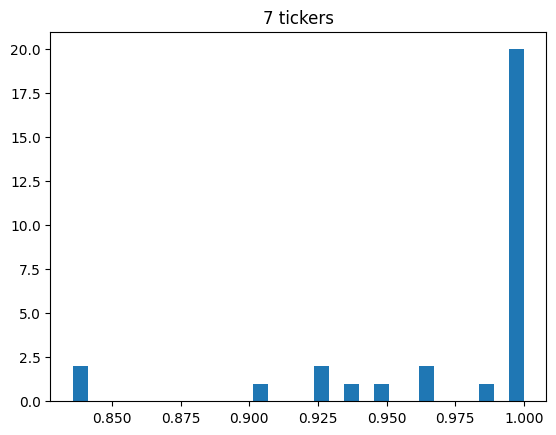

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_name = f"result/HHL/final/merged_results_dedup.csv"
# 读取CSV文件
data = pd.read_csv(file_name)
# 选取数据
df = data[['tickers', 'num', 'qubit_num', 'similarity']]

# df = df[df['similarity'] > 0.9]
num_assets = 7
subset = df[df['num'] == num_assets]
str_show = 'similarity'
n_unique = subset[str_show].nunique()
n, bins, patches = plt.hist(subset[str_show], bins=n_unique)
# 循环遍历每个柱子并添加文本标注
# for i in range(len(patches)):
#     plt.text(x=bins[i]+(bins[i+1]-bins[i])/2, y=n[i]+5, s=str(int(n[i])), ha='center')
plt.title(f"{num_assets} tickers")
plt.show()

## 作图

作图的形式? 柱状图 or 箱线图

是否需要过滤数据

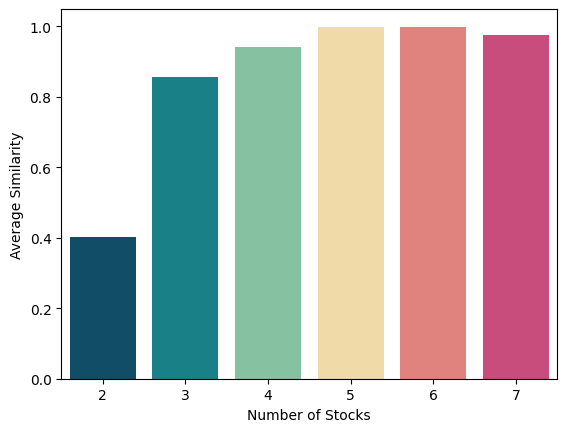

In [4]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_name = f"result/HHL/final/merged_results_dedup.csv"
# 读取CSV文件
data = pd.read_csv(file_name)
# 选取数据
df = data[['tickers', 'num', 'qubit_num', 'similarity']]

# df = df[df['similarity'] > 0.9]
# 按照 num 列的值对 similarity 列进行分组并求平均
average_similarity = df.groupby('num')['similarity'].mean()

data = {
    'labels': average_similarity.index,
    'values': average_similarity.values
}

df = pd.DataFrame(data)
# 绘制柱状图
colors = [
    (4, 82, 117),
    (8, 144, 153),
    (124, 203, 162),
    (252, 222, 156),
    (240, 116, 110),
    (220, 57, 119),
    #(124, 29, 111),
]
colors = [(r / 255, g / 255, b / 255) for r, g, b in colors]

# plt.bar(average_similarity.index, average_similarity.values, colors=colors)
sns.barplot(x='labels', y='values', data=df, palette=colors)

plt.xlabel('Number of Stocks')
plt.ylabel('Average Similarity')
#plt.title('Average similarity by num')

# 设置图像的分辨率
dpi = 300  # 设置dpi值
# 保存图像
output_filename = f"image/HHL/result_v1.pdf"
plt.savefig(output_filename, dpi=dpi, bbox_inches='tight')

plt.show()